Trying out some neural model and leaky relu for fun, maybe try and get it to output some probabilities of y in bins from 100-110, 110-120 etc.

In [118]:
%matplotlib inline

In [119]:
#help(LeakyReLU)

In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
print(train.shape)
test = pd.read_csv("test.csv")
print(test.shape)
targets = train['y']
train = train.drop('y', axis=1)
print(train.shape)

(4209, 378)
(4209, 377)
(4209, 377)


In [122]:
print(test.shape)
print(train.shape)

(4209, 377)
(4209, 377)


In [123]:
print(targets.min())
print(targets.max())
print(len(range(70, 270, 5)))
bin1 = ((targets > 70) & (targets < 75)).astype(int)
bin2 = ((targets > 75) & (targets < 80)).astype(int)
bin3 = ((targets > 80) & (targets < 85)).astype(int)
bin4 = ((targets > 85) & (targets < 90)).astype(int)
bin5 = ((targets > 90) & (targets < 95)).astype(int)
bin6 = ((targets > 95) & (targets < 100)).astype(int)
bin7 = ((targets > 100) & (targets < 105)).astype(int)
bin8 = ((targets > 105) & (targets < 110)).astype(int)
bin9 = ((targets > 110) & (targets < 115)).astype(int)
bin10 = ((targets > 115) & (targets < 120)).astype(int)
bin11 = ((targets > 120) & (targets < 125)).astype(int)
bin12 = ((targets > 125) & (targets < 130)).astype(int)
bin13 = ((targets > 130) & (targets < 135)).astype(int)
bin14 = ((targets > 135) & (targets < 140)).astype(int)
bin15 = ((targets > 140) & (targets < 145)).astype(int)
bin16 = ((targets > 145) & (targets < 150)).astype(int)
bin17 = ((targets > 150) & (targets < 155)).astype(int)
bin18 = ((targets > 155) & (targets < 160)).astype(int)
bin19 = ((targets > 160) & (targets < 165)).astype(int)
bin20 = (targets > 165).astype(int)

72.11
265.32
40


In [124]:
bins = pd.concat([bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,
                 bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20], axis=1)
bins.shape

(4209, 20)

In [125]:
targets = bins

In [126]:
df = pd.concat([train,test], axis=0)
df.index = range(0,8418)
ids = df['ID']
df.shape

(8418, 377)

In [127]:
le = LabelEncoder()
enc = OneHotEncoder()
X0 = df['X0'].T
X1 = df['X1'].T
X2 = df['X2'].T
X3 = df['X3'].T
X4 = df['X4'].T
X5 = df['X5'].T
X6 = df['X6'].T
X8 = df['X8'].T

len(list(X0.unique()))

53

In [128]:
le.fit(X0)
X0 = le.transform(X0)
X0 = pd.get_dummies(X0)

le.fit(X1)
X1 = le.transform(X1)
X1 = pd.get_dummies(X1)

le.fit(X2)
X2 = le.transform(X2)
X2 = pd.get_dummies(X2)

le.fit(X3)
X3 = le.transform(X3)
X3 = pd.get_dummies(X3)

le.fit(X4)
X4 = le.transform(X4)
X4 = pd.get_dummies(X4)

le.fit(X5)
X5 = le.transform(X5)
X5 = pd.get_dummies(X5)

le.fit(X6)
X6 = le.transform(X6)
X6 = pd.get_dummies(X6)

le.fit(X8)
X8 = le.transform(X8)
X8 = pd.get_dummies(X8)

In [129]:
categoricals = pd.concat([X0, X1, X2, X3, X4, X5, X6, X8], axis=1)
print(categoricals.shape)

(8418, 211)


In [130]:
df = df.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)

In [131]:
print(list(df.dtypes.unique()))
print(df.max().max())
print(df.min().min())
print(df.shape[0]*df.shape[1])

[dtype('int64')]
8417
0
3106242


In [132]:
df_ = pd.get_dummies(df)

In [133]:
print(df_.shape)
print(categoricals.shape)
print(targets.shape)

(8418, 369)
(8418, 211)
(4209, 20)


In [134]:
df = pd.concat([categoricals, df_], axis=1)
print(df.shape)
print(df.shape[0]*df.shape[1])

(8418, 580)
4882440


In [135]:
train = df[0:4209]
test = df[4209:]
print(train.shape)
print(test.shape)

(4209, 580)
(4209, 580)


In [136]:
def transforms(df):
    dfX = pd.DataFrame(df)
    m = 5
    df = np.add(dfX,abs(m))
    rt = 1/df
    rs = 1/np.sqrt(df)
    s = np.sqrt(df)
    l = np.log(df)
    d_list = [df, rt, rs, s, l]
    d = pd.concat(d_list, axis=1)
    return d

In [137]:
ttrain = train

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, targets, random_state=16)

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300).fit(x_train)

In [140]:
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)
print(train_pca.shape)
print(test_pca.shape)

(3156, 300)
(1053, 300)


In [141]:
x_train = np.concatenate((x_train, train_pca), axis=1)
x_test = np.concatenate((x_test, test_pca), axis=1)
print(x_train.shape)
print(x_test.shape)

(3156, 880)
(1053, 880)


In [142]:
from keras import optimizers
adam = optimizers.adam(lr=0.0001)

In [143]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

def create_model():  
    model = Sequential() 
    model.add(Dense(500, input_dim=880, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))
    model.add(Dense(75, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.7))
    model.add(Dense(20, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [145]:
y_train, y_test = y_train.values, y_test.values

In [146]:
model = create_model()
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32,
         verbose=0, epochs=100)

In [147]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Success rate: %.2f%%" % (score[1]*100))
print("Random guess 1-20 bins: %.2f%%" % (1/20*100))

Success rate: 41.50%
Random guess 1-20 bins: 5.00%


In [148]:
train_pca = pca.transform(train)
train = np.concatenate((train, train_pca), axis=1)
train = scaler.transform(train)
train_data_probabilities = model.predict(train)

In [149]:
test_pca = pca.transform(test)
test = np.concatenate((test, test_pca), axis=1)
test = scaler.transform(test)

In [150]:
test_data_probabilities = model.predict(test)

In [151]:
import seaborn as sns
sns.set_style("dark")

In [152]:
bin_names = ['70-75', '75-80', '80-85', '85-90', '90-95', '95-100',
            '100-105', '105-110', '110-115', '115-120', '120-125',
            '125-130', '130-135', '135-140', '140-145', '145-150',
            '150-155', '155-160', '160-165', '165>']
averages = [72.5, 77.5, 82.5, 87.5, 92.5, 97.5, 102.5, 107.5, 112.5, 117.5,
            122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5,
            167.5]

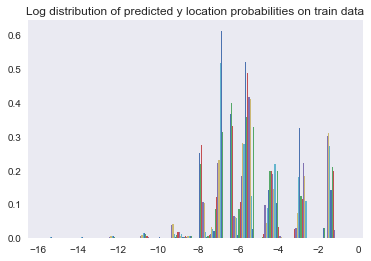

In [153]:
plt.hist(np.log(train_data_probabilities+0.0000001), normed=True)
plt.title("Log distribution of predicted y location probabilities on train data")
plt.show()

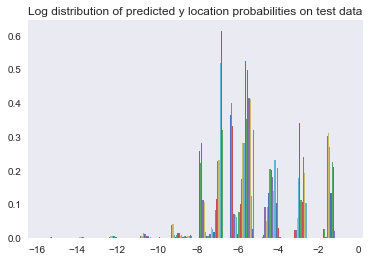

In [154]:
plt.hist(np.log(test_data_probabilities+0.0000001), normed=True)
plt.title("Log distribution of predicted y location probabilities on test data")
plt.show()

In [155]:
all_probs = (np.concatenate((train_data_probabilities, test_data_probabilities), axis=0))

In [156]:
all_probs = pd.DataFrame(all_probs)
all_probs.columns = averages

In [157]:
all_probs_bins = all_probs.idxmax(axis=1)

In [158]:
train_data_bins = all_probs_bins[0:4209]
test_data_bins = all_probs_bins[4209:]

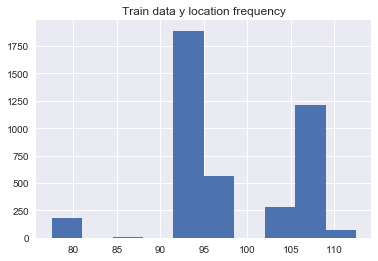

In [159]:
train_data_bins.hist()
plt.title("Train data y location frequency");

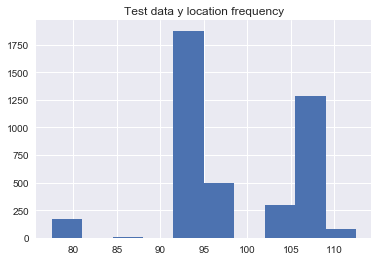

In [160]:
test_data_bins.hist()
plt.title("Test data y location frequency");

In [161]:
train_median_probabilities = pd.DataFrame(train_data_probabilities).median()
train_median_probabilities.index = bin_names

In [162]:
test_median_probabilities = pd.DataFrame(test_data_probabilities).median()
test_median_probabilities.index = bin_names

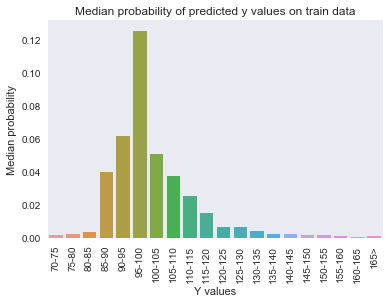

In [163]:
ax = sns.barplot(x=train_median_probabilities.index, y=train_median_probabilities)
ax.set_ylabel(ylabel='Median probability')
ax.set_title(label='Median probability of predicted y values on train data')
ax.set_xlabel(xlabel = 'Y values')
ax.set_xticklabels(labels = train_median_probabilities.index, rotation=90);

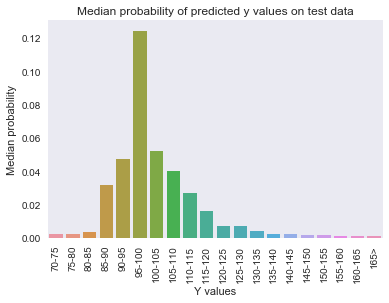

In [164]:
ax = sns.barplot(x=test_median_probabilities.index, y=test_median_probabilities)
ax.set_ylabel(ylabel='Median probability')
ax.set_title(label='Median probability of predicted y values on test data')
ax.set_xlabel(xlabel = 'Y values')
ax.set_xticklabels(labels = test_median_probabilities.index, rotation=90);

In [165]:
Y = pd.read_csv("train.csv")
c = Y['y']
trueVpredict = pd.concat([train_data_bins, c], axis=1)
trueVpredict.columns = ['predicted location', 'true location']
test_data_predictions = trueVpredict['predicted location']
trueVpredict.head()

,predicted location,true location
0,92.5,130.81
1,87.5,88.53
2,77.5,76.26
3,77.5,80.62
4,77.5,78.02


In [166]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(trueVpredict['true location'],trueVpredict['predicted location'])
print("R2 all data: ", r2_score)

R2 all data:  0.508820636918


In [167]:
rmse_score = np.sqrt(mean_squared_error(trueVpredict['true location'],trueVpredict['predicted location']))
print("RMSE all data: ", rmse_score)

RMSE all data:  8.88518592992


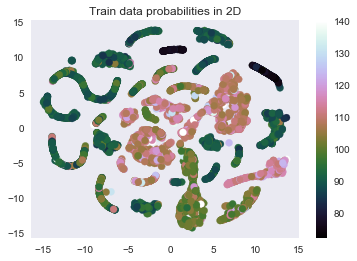

In [168]:
from sklearn.manifold import TSNE
Y = pd.read_csv("train.csv")
train_c = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis=0)
train_c = np.clip(c, c.min(), 140)
tsne = TSNE(n_components=2, perplexity=50)
X = tsne.fit_transform(train_data_probabilities)
ax = plt.scatter(X[:, 0], X[:, 1], c=train_c, cmap="cubehelix")
plt.colorbar(ax)
plt.title("Train data probabilities in 2D");

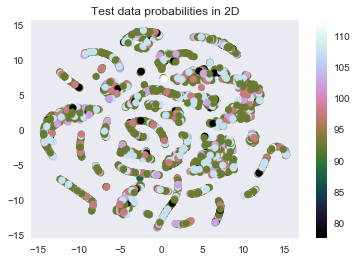

In [169]:
X = tsne.fit_transform(test_data_probabilities)
test_c = test_data_predictions
test_c = np.clip(test_c, test_c.min(), 140)
ax = plt.scatter(X[:, 0], X[:, 1], c=test_c, cmap="cubehelix")
plt.colorbar(ax)
plt.title("Test data probabilities in 2D");

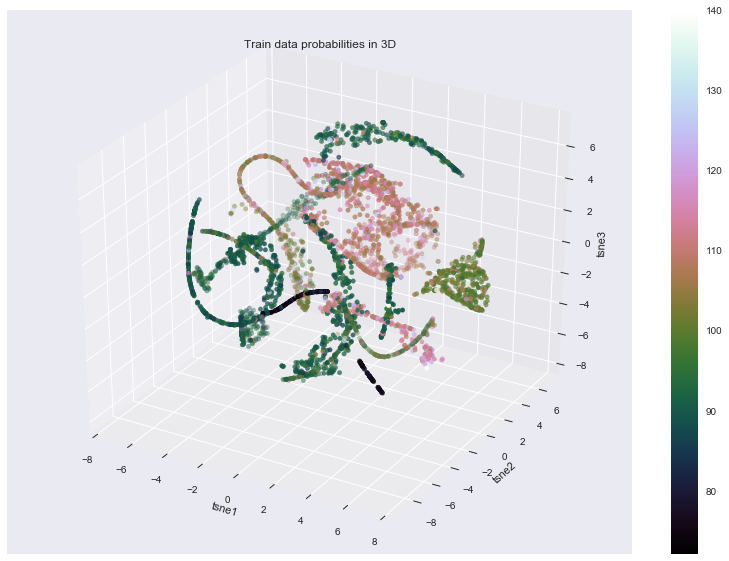

In [170]:
from mpl_toolkits import mplot3d
from matplotlib import cm
tsne = TSNE(n_components=3, perplexity=50)
X = tsne.fit_transform(train_data_probabilities)
X1 = np.meshgrid(X[:, 0])
X2 = np.meshgrid(X[:, 1])
X3 = np.meshgrid(X[:, 2])

plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, X3, c=train_c, cmap="cubehelix")
m = cm.ScalarMappable(cmap="cubehelix")
m.set_array(train_c)
cbar = plt.colorbar(m)
ax.set_xlabel("tsne1")
ax.set_ylabel("tsne2")
ax.set_zlabel("tsne3")
plt.title("Train data probabilities in 3D")
plt.show();

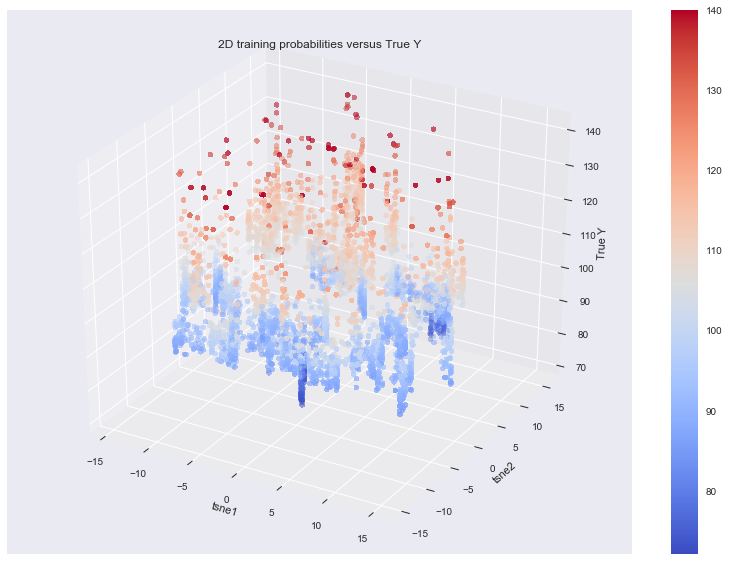

In [171]:
tsne = TSNE(n_components=2, perplexity=50)
X = tsne.fit_transform(X)
X1 = np.meshgrid(X[:, 0])
X2 = np.meshgrid(X[:, 1])
X3 = np.meshgrid(train_c)

plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, X3, c= train_c, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
m = cm.ScalarMappable(cmap=cm.coolwarm)
m.set_array(train_c)
cbar = plt.colorbar(m)
ax.set_xlabel("tsne1")
ax.set_ylabel("tsne2")
ax.set_zlabel("True Y")
plt.title("2D training probabilities versus True Y")
plt.show();

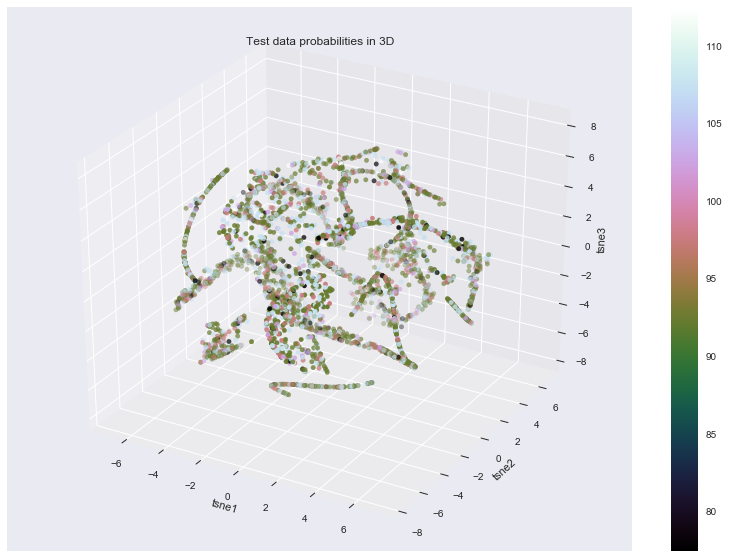

In [172]:
tsne = TSNE(n_components=3, perplexity=50)
X = tsne.fit_transform(test_data_probabilities)
X1 = np.meshgrid(X[:, 0])
X2 = np.meshgrid(X[:, 1])
X3 = np.meshgrid(X[:, 2])

plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, X3, c=test_c, cmap="cubehelix")
m = cm.ScalarMappable(cmap="cubehelix")
m.set_array(test_c)
cbar = plt.colorbar(m)
ax.set_xlabel("tsne1")
ax.set_ylabel("tsne2")
ax.set_zlabel("tsne3")
plt.title("Test data probabilities in 3D")
plt.show();

In [173]:
Y = pd.read_csv("train.csv")
c = Y['y']
trueVpredict = pd.concat([train_data_bins, c], axis=1)
trueVpredict.columns = ['predicted location', 'true location']
trueVpredict.tail(10)

,predicted location,true location
4199,92.5,88.24
4200,97.5,108.59
4201,107.5,107.39
4202,107.5,123.34
4203,92.5,85.71
4204,107.5,107.39
4205,107.5,108.77
4206,107.5,109.22
4207,92.5,87.48
4208,92.5,110.85


In [174]:
print("Test data predicted locations")
pd.DataFrame(test_data_bins.head(10)).T

Test data predicted locations


,4209,4210,4211,4212,4213,4214,4215,4216,4217,4218
0,77.5,87.5,77.5,77.5,107.5,92.5,107.5,92.5,112.5,92.5


In [175]:
test = pd.read_csv("test.csv")

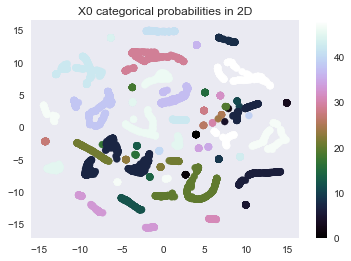

In [176]:
X0 = test['X0']
le.fit(X0)
X0 = le.transform(X0)
X0_ = pd.get_dummies(X0)
X = np.concatenate((X0_, X), axis=1)
scaler.fit(X)
X = scaler.transform(X)

tsne = TSNE(n_components=2, perplexity=50)
X = tsne.fit_transform(X)
ax = plt.scatter(X[:, 0], X[:, 1], c=X0, cmap="cubehelix")
plt.colorbar(ax)
plt.title("X0 categorical probabilities in 2D");

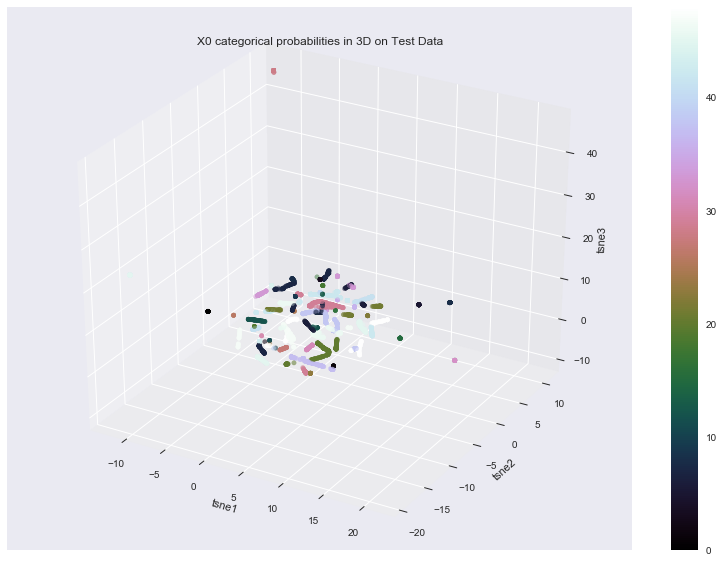

In [177]:
X0 = test['X0']
le.fit(X0)
X0 = le.transform(X0)
X0_ = pd.get_dummies(X0)
X = np.concatenate((X0_, X), axis=1)
scaler.fit(X)
X = scaler.transform(X)

tsne = TSNE(n_components=3, perplexity=50)
X = tsne.fit_transform(X)
X1 = np.meshgrid(X[:, 0])
X2 = np.meshgrid(X[:, 1])
X3 = np.meshgrid(X[:, 2])

plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, X3, c=X0, cmap="cubehelix")
m = cm.ScalarMappable(cmap="cubehelix")
m.set_array(X0)
cbar = plt.colorbar(m)
ax.set_xlabel("tsne1")
ax.set_ylabel("tsne2")
ax.set_zlabel("tsne3")
plt.title("X0 categorical probabilities in 3D on Test Data")
plt.show();

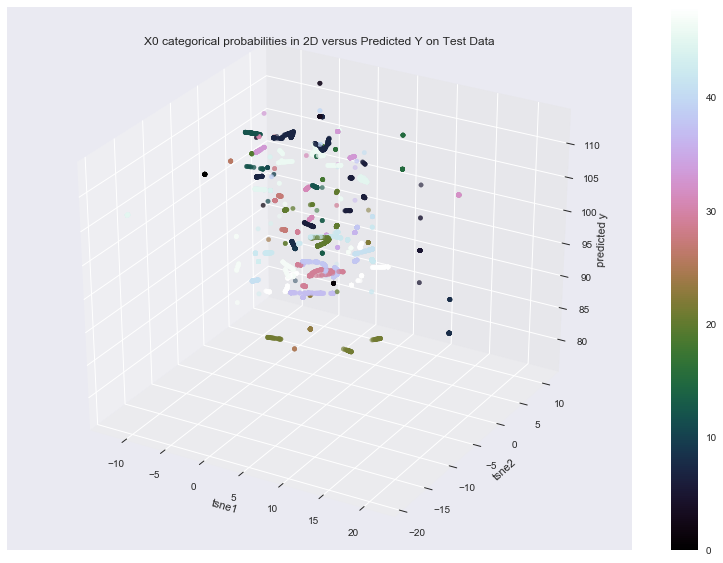

In [178]:
X1 = np.meshgrid(X[:, 0])
X2 = np.meshgrid(X[:, 1])
X3 = np.meshgrid(test_data_bins)

plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, X3, c=X0, cmap="cubehelix")
m = cm.ScalarMappable(cmap="cubehelix")
m.set_array(X0)
cbar = plt.colorbar(m)
ax.set_xlabel("tsne1")
ax.set_ylabel("tsne2")
ax.set_zlabel("predicted y")
plt.title("X0 categorical probabilities in 2D versus Predicted Y on Test Data")
plt.show();

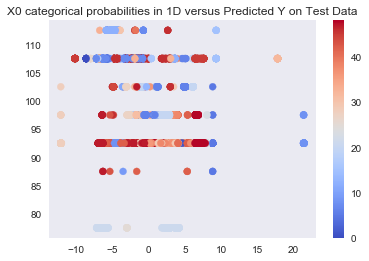

In [179]:
ax = plt.scatter(X1, X3, c=X0, cmap=cm.coolwarm)
plt.colorbar(ax)
plt.title("X0 categorical probabilities in 1D versus Predicted Y on Test Data");

In [180]:
X0s = test['X0']

df = pd.concat([X0s, pd.DataFrame(test_data_probabilities)], axis=1)
counts = df.groupby(['X0']).count().iloc[:,0]
medians = df.groupby(['X0']).max().median(axis=1)
means = df.groupby(['X0']).max().mean(axis=1)

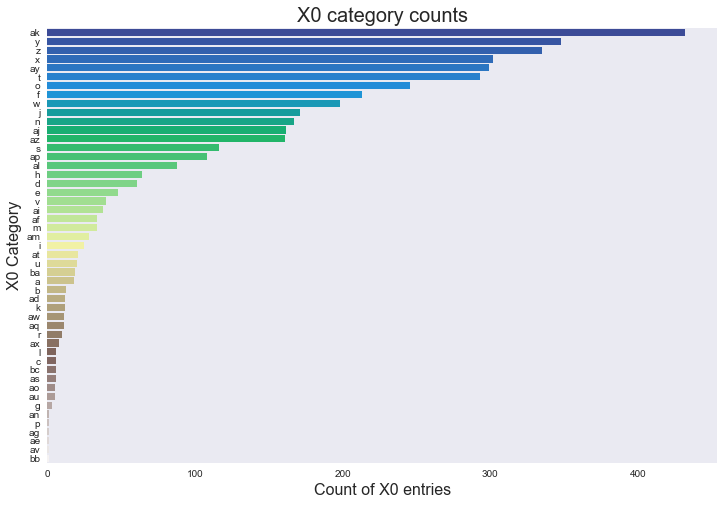

In [181]:
colors = sns.color_palette("terrain", len(counts))
plt.figure(figsize=(12,8))
counts = counts.sort_values(ascending=False)
ax = sns.barplot(y = counts.index , x = counts, orient='h', palette=colors)
ax.set_xlabel(xlabel='Count of X0 entries', fontsize=16)
ax.set_ylabel(ylabel='X0 Category', fontsize=16)
ax.set_title(label='X0 category counts', fontsize=20)
plt.show();

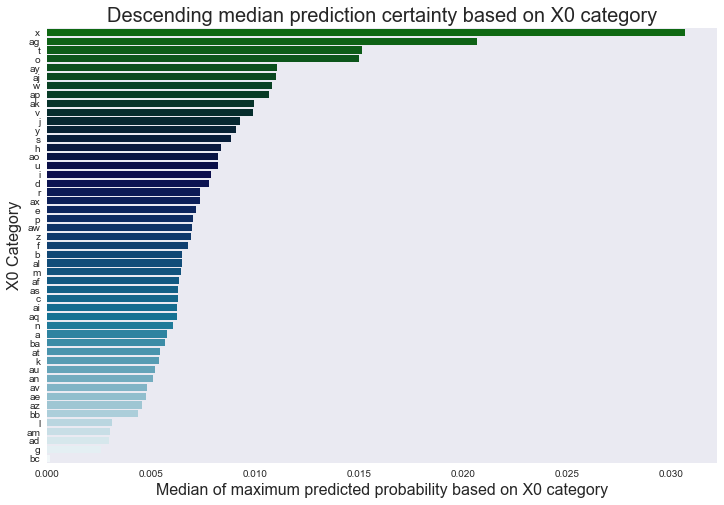

In [182]:
colors = sns.color_palette("ocean", len(medians))
medians = pd.DataFrame(medians.sort_values(ascending=False))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = medians.index , x = medians[0], orient='h', palette=colors)
ax.set_xlabel(xlabel='Median of maximum predicted probability based on X0 category', fontsize=16)
ax.set_ylabel(ylabel='X0 Category', fontsize=16)
ax.set_title(label='Descending median prediction certainty based on X0 category', fontsize=20)
plt.show();

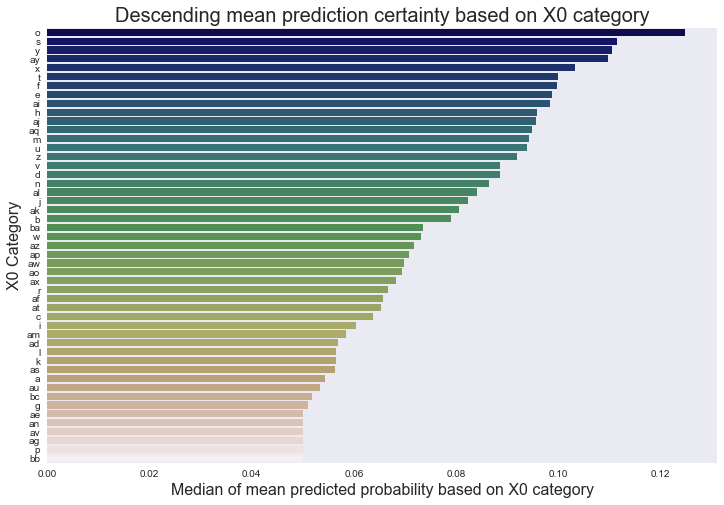

In [183]:
colors = sns.color_palette("gist_earth", len(means))
means = pd.DataFrame(means.sort_values(ascending=False))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = means.index , x = means[0], orient='h', palette=colors)
ax.set_xlabel(xlabel='Median of mean predicted probability based on X0 category', fontsize=16)
ax.set_ylabel(ylabel='X0 Category', fontsize=16)
ax.set_title(label='Descending mean prediction certainty based on X0 category', fontsize=20)
plt.show();

In [184]:
test = pd.read_csv("test.csv")
ids = pd.DataFrame((test['ID'].values).reshape(4209,1))
sub = pd.DataFrame(((test_data_bins.values).reshape(4209,1)))
sub = pd.concat([ids, sub], axis=1)
sub.columns = ['ID', 'y']
sub.head(1)

,ID,y
0,1,77.5


In [185]:
sub.to_csv('./maxbin_sub.csv', index=False)

In [186]:
test_data_probabilities = pd.DataFrame(test_data_probabilities)
test_data_probabilities.columns = bin_names
test_data_probabilities.head()

,70-75,75-80,80-85,85-90,90-95,95-100,100-105,105-110,110-115,115-120,120-125,125-130,130-135,135-140,140-145,145-150,150-155,155-160,160-165,165>
0,0.283176,0.642682,0.071299,0.000200,0.000039,1.602652e-06,1.296041e-06,0.000010,0.000052,0.000063,0.000239,0.000106,0.000282,0.000306,0.000221,0.000483,0.000241,0.000211,0.000150,0.000238
1,0.018057,0.024249,0.024140,0.386225,0.381167,7.890579e-02,2.766573e-02,0.007065,0.007061,0.005997,0.004807,0.004568,0.006803,0.003449,0.003194,0.003349,0.003345,0.002673,0.002439,0.004841
2,0.279869,0.653948,0.063416,0.000094,0.000018,8.422293e-07,9.063185e-07,0.000011,0.000062,0.000070,0.000276,0.000112,0.000266,0.000329,0.000228,0.000503,0.000239,0.000208,0.000146,0.000206
3,0.287795,0.603929,0.098562,0.001841,0.000498,2.878571e-05,1.886884e-05,0.000055,0.000197,0.000237,0.000643,0.000347,0.000851,0.000777,0.000602,0.001160,0.000681,0.000584,0.000448,0.000748
4,0.004079,0.005235,0.003296,0.009813,0.011805,4.708197e-02,1.128640e-01,0.340153,0.222918,0.110658,0.042307,0.034033,0.012263,0.013516,0.009325,0.006487,0.005536,0.003431,0.002558,0.002641


In [187]:
print(test_data_probabilities.shape)
test_data_probabilities.to_csv('./test_data_probabilities.csv', index=False)

(4209, 20)


In [188]:
train_data = ttrain
train_data_pca = pca.transform(ttrain)
train_data = np.concatenate((train_data, train_data_pca), axis=1)
train_data = scaler.fit_transform(train_data)
train_data_probabilities = pd.DataFrame(model.predict(train_data))
train_data_probabilities.columns = bin_names
train_data_probabilities.head()

,70-75,75-80,80-85,85-90,90-95,95-100,100-105,105-110,110-115,115-120,120-125,125-130,130-135,135-140,140-145,145-150,150-155,155-160,160-165,165>
0,0.081730,0.130554,0.052580,0.066645,0.063137,4.015082e-02,5.455948e-02,0.111608,0.115834,0.065983,0.051077,0.034177,0.025378,0.022422,0.019079,0.019359,0.014912,0.010802,0.009074,0.010940
1,0.002508,0.002643,0.007671,0.500893,0.452094,2.470838e-02,2.904751e-03,0.000375,0.000502,0.000506,0.000443,0.000481,0.001249,0.000423,0.000338,0.000346,0.000394,0.000304,0.000272,0.000946
2,0.279347,0.652180,0.066515,0.000120,0.000021,7.452628e-07,6.118007e-07,0.000005,0.000029,0.000038,0.000149,0.000067,0.000191,0.000225,0.000154,0.000354,0.000174,0.000151,0.000108,0.000171
3,0.284011,0.631998,0.080249,0.000438,0.000093,3.790340e-06,2.708183e-06,0.000013,0.000062,0.000079,0.000270,0.000132,0.000359,0.000362,0.000266,0.000575,0.000306,0.000265,0.000196,0.000321
4,0.278109,0.649498,0.069721,0.000132,0.000025,1.108728e-06,1.010366e-06,0.000009,0.000050,0.000060,0.000230,0.000100,0.000259,0.000305,0.000213,0.000482,0.000237,0.000203,0.000147,0.000217


In [189]:
print(train_data_probabilities.shape)
train_data_probabilities.to_csv('./train_data_probabilities.csv', index=False)

(4209, 20)


In [190]:
weights = pd.DataFrame(test_data_probabilities)
avgs = np.ones_like(weights) * np.array(averages)
weighted_pred = weights * avgs
weighted_pred = weighted_pred.sum(axis=1)
sub = pd.DataFrame(((weighted_pred.values).reshape(4209,1)))
sub = pd.concat([ids, sub], axis=1)
sub.columns = ['ID', 'y']
sub = sub.iloc[0:4209]
print(sub.shape)
sub.head()

(4209, 2)


,ID,y
0,1,76.615070
1,2,92.654488
2,3,76.592044
3,4,77.061884
4,5,111.263460


In [191]:
sub.to_csv('./weightedAvg_sub.csv', index=False)